<a href="https://colab.research.google.com/github/sakshiigdtuw/Python-ML-Project/blob/main/AQI_INDEX_ML_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
# pd.read_csv(r'/content/drive/MyDrive/AWS Technical Cohort ML Project/air_pollution_data.csv')
from google.colab import files
dataset = files.upload()
print(dataset)

Saving air_pollution_data.csv to air_pollution_data (1).csv
{'air_pollution_data (1).csv': b'city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3\r\nAhmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36\r\nAhmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.7,120.95,154.53,27.36\r\nAhmedabad,02-12-2020,5,1815.8,16.54,49.35,0.17,23.84,133.47,172.63,28.12\r\nAhmedabad,03-12-2020,5,2296.45,41.57,40.1,0,35.76,150.37,202.15,36.48\r\nAhmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.8,40.53\r\nAhmedabad,05-12-2020,5,3845.22,57.22,137.09,0,110.63,249.51,322.46,178.34\r\nAhmedabad,06-12-2020,5,2883.91,27.94,98.71,0.02,84.88,232.03,281.96,96.26\r\nAhmedabad,07-12-2020,5,1628.88,19.89,40.1,0.02,21.22,106.27,143.12,31.67\r\nAhmedabad,08-12-2020,5,1735.69,9.28,59.63,0.59,25.99,122.37,163.42,43.06\r\nAhmedabad,09-12-2020,5,2857.21,34.87,69.92,0,46.25,213.63,276.18,58.77\r\nAhmedabad,10-12-2020,5,1762.39,6.48,67.17,1.54,28.61,145.72,184.11,38\r\nAhmedabad,11-12-2020,5,540.73,0

In [ ]:
df = pd.read_csv('air_pollution_data.csv')
df.head()

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53


In [ ]:
df.tail()

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
23499,Visakhapatnam,21-05-2023,3,353.81,0.0,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.0,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.0,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.0,1.36,95.84,2.21,30.17,48.89,0.00
23503,Visakhapatnam,25-05-2023,4,427.25,0.0,6.00,88.69,10.73,52.36,61.41,0.20


In [88]:
df.columns

Index(['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

In [89]:
df.index

Index(['Ahmedabad', 'Ahmedabad', 'Ahmedabad', 'Ahmedabad', 'Ahmedabad',
       'Ahmedabad', 'Ahmedabad', 'Ahmedabad', 'Ahmedabad', 'Ahmedabad',
       ...
       'Visakhapatnam', 'Visakhapatnam', 'Visakhapatnam', 'Visakhapatnam',
       'Visakhapatnam', 'Visakhapatnam', 'Visakhapatnam', 'Visakhapatnam',
       'Visakhapatnam', 'Visakhapatnam'],
      dtype='object', name='city', length=23504)

In [90]:
if not isinstance(df.index, pd.DatetimeIndex):
    start_date = '30-11-2020'  # Adjust based on your data
    df['date'] = pd.date_range(start=start_date, periods=len(df), freq='D')
    df.set_index('date', inplace=True)
    df.index = pd.to_datetime(df.index)

In [91]:
# Sort by date
df.sort_index(inplace=True)

In [93]:
df.isnull().sum()

,0
aqi,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0
nh3,0


# Exploratory Data Analysis **(EDA)**

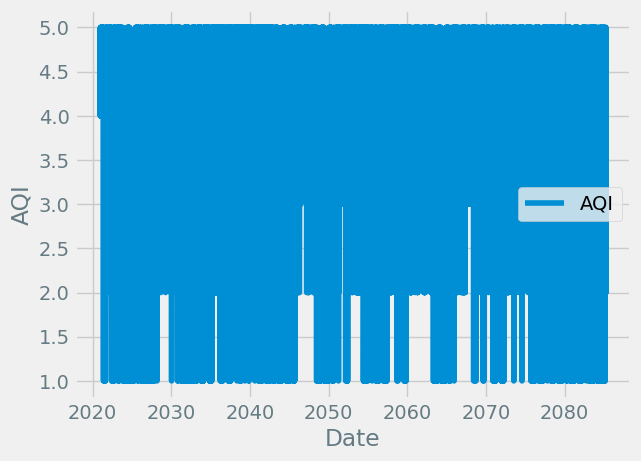

In [95]:
# AQI trend visualization

plt.plot(figsize=(15,5),title='AQI Trend',color=color_pal[0])
plt.plot(df.index,df['aqi'],label='AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

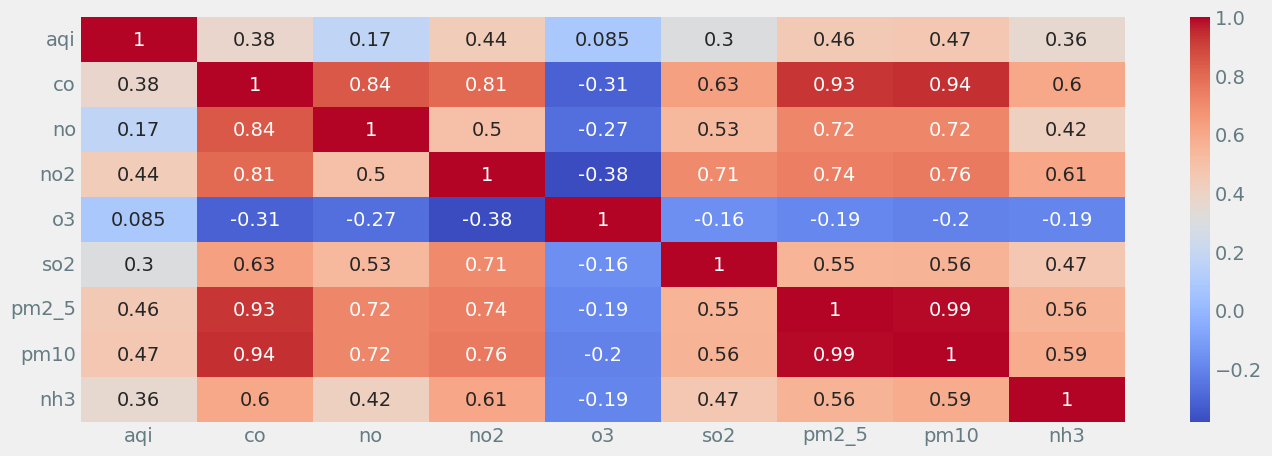

In [96]:
# Correlation Analysis
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [97]:
# Temporal Features

df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df['year'] = df.index.year

In [98]:
#  LAG Features( Create lag features for the past 7 days)
for lag in range(1,8):
    df[f'aqi_lag_{lag}'] = df['aqi'].shift(lag)

In [99]:
# Calculate rolling mean and standard deviation to capture trends.

df['aqi_roll_mean_7'] = df['aqi'].rolling(window=7).mean()
df['aqi_roll_std_7'] = df['aqi'].rolling(window=7).std()

In [100]:
# Missing value handling by feature engine
df.dropna(inplace=True)

Data Preparation for Modeling

In [101]:
x = df.drop(['aqi'],axis=1)
y = df['aqi']

In [102]:
# dataset splitting
split_date = '14-02-2023'

train = df[df.index < split_date]
test = df[df.index >= split_date]

X_train = train.drop(['aqi'], axis=1)
y_train = train['aqi']
X_test = test.drop(['aqi'], axis=1)
y_test = test['aqi']

In [106]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=False)

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Random Forest - Mean Squared Error: 0.04020397872340426
Random Forest - Mean Absolute Error: 0.08444468085106382


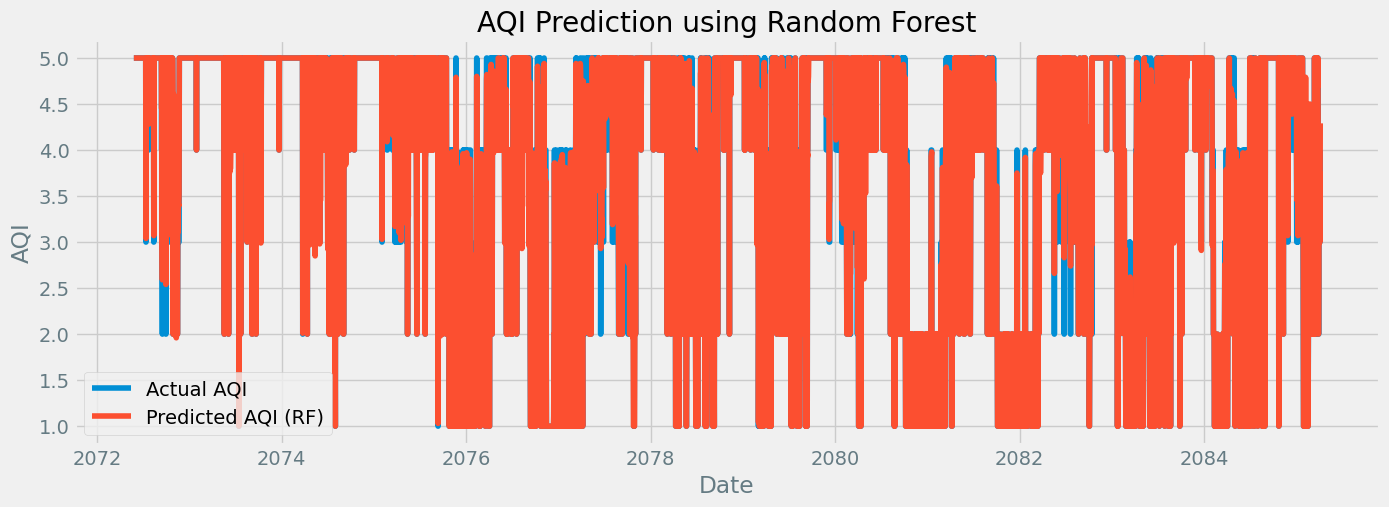

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(x_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - Mean Absolute Error: {mae_rf}')

# Plot predictions vs actual
plt.figure(figsize=(15,5))
plt.plot(y_test.index, y_test, label='Actual AQI')
plt.plot(y_test.index, y_pred_rf, label='Predicted AQI (RF)')
plt.title('AQI Prediction using Random Forest')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()


In [111]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,random_state=42,learning_rate=0.1)
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [114]:
# predict on test model
y_pred = xgb_model.predict(x_test)


In [117]:
# Evaluation of model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_xgb = mean_squared_error(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)
print(f'XGBoost - Mean Squared Error: {mse_xgb}')
print(f'XGBoost - Mean Absolute Error: {mae_xgb}')

XGBoost - Mean Squared Error: 0.04286151342919404
XGBoost - Mean Absolute Error: 0.09154578234287018


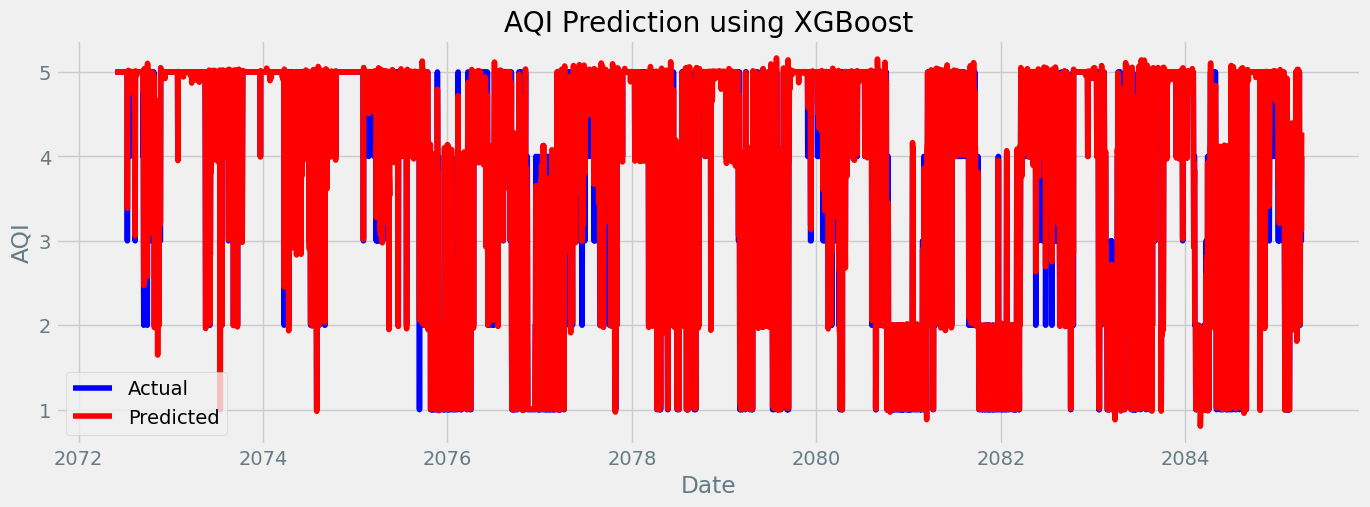

In [121]:
# Plot predictions vs actual
plt.figure(figsize=(15,5))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('AQI Prediction using XGBoost')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp011lm7b8/77mi2va0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp011lm7b8/5z9cbkf4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78806', 'data', 'file=/tmp/tmp011lm7b8/77mi2va0.json', 'init=/tmp/tmp011lm7b8/5z9cbkf4.json', 'output', 'file=/tmp/tmp011lm7b8/prophet_modelryoq4w42/prophet_model-20241126175250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


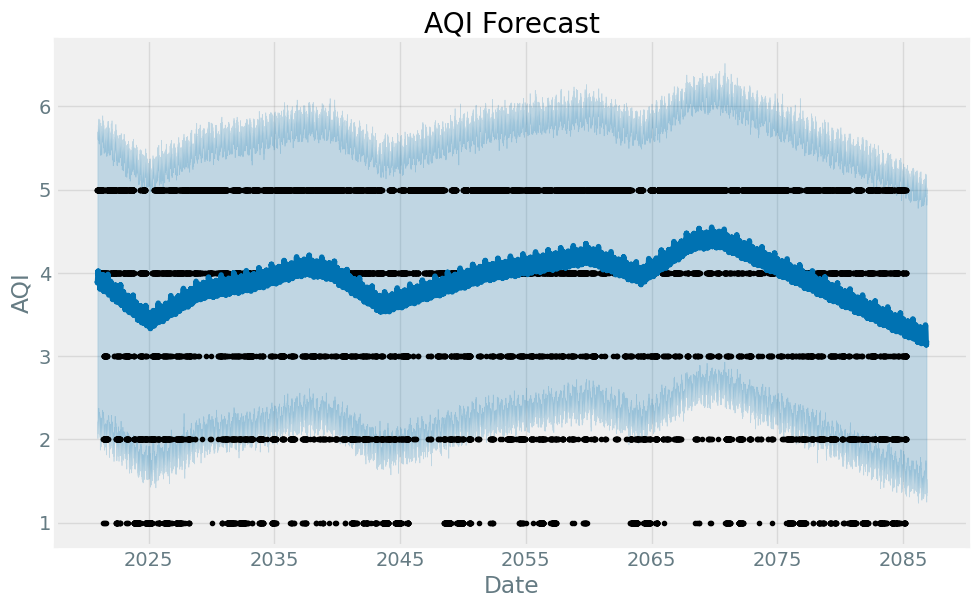

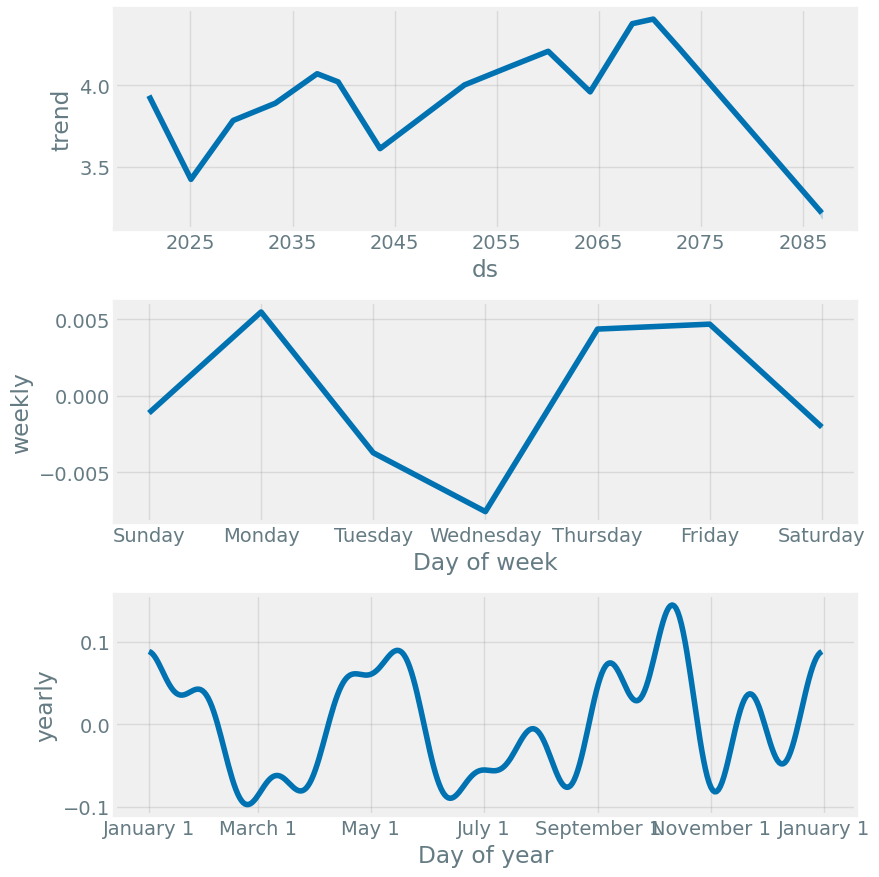

              ds      yhat  yhat_lower  yhat_upper
900   2023-05-26  3.676985    1.947276    5.431280
901   2023-05-27  3.660542    1.955711    5.504944
902   2023-05-28  3.651253    1.831526    5.473201
903   2023-05-29  3.647302    1.934726    5.419102
904   2023-05-30  3.627331    1.900289    5.344569
...          ...       ...         ...         ...
24076 2086-11-07  3.151173    1.525321    5.027135
24077 2086-11-08  3.157746    1.526393    4.989590
24078 2086-11-09  3.158481    1.416389    4.993007
24079 2086-11-10  3.167840    1.364278    4.953907
24080 2086-11-11  3.183599    1.476162    5.003112

[23181 rows x 4 columns]


In [133]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = df.reset_index()[['date', 'aqi']].rename(columns={'date': 'ds', 'aqi': 'y'})

# Initialize and fit the model
m = Prophet()
m.fit(prophet_df)

# Create a dataframe to hold future dates (e.g., 365 days for 2024)
future = m.make_future_dataframe(periods=584)

# Predict
forecast = m.predict(future)

# Plot the forecast
fig1 = m.plot(forecast)
plt.title('AQI Forecast')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

# Plot forecast components
fig2 = m.plot_components(forecast)
plt.show()

# Extract forecast for 2024
forecast_2024 = forecast[forecast['ds'] >= '26-05-2023']
print(forecast_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


In [136]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best CV score: {grid_search.best_score_}')

# Use the best estimator for predictions
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)

# Evaluate
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
print(f'Best Random Forest - MSE: {mse_best_rf}, MAE: {mae_best_rf}')


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best CV score: -0.05916418619866526
Best Random Forest - MSE: 0.042321624492049396, MAE: 0.08481943855608721


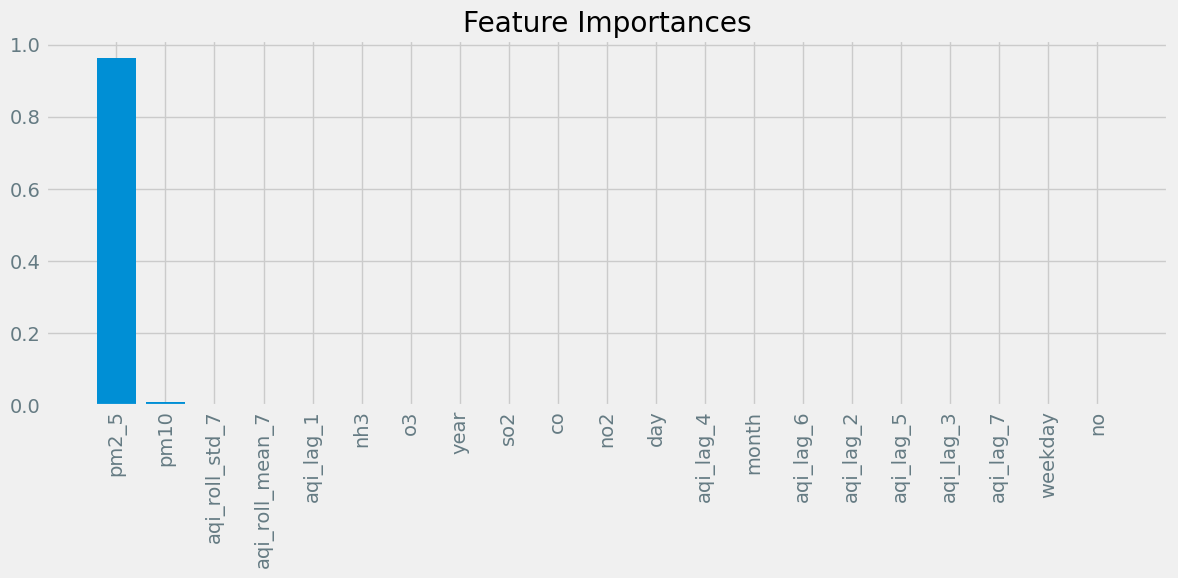

In [139]:

# features influence AQI the most
# For Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = x.columns

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'AQI in cities chart'}, xlabel='city'>

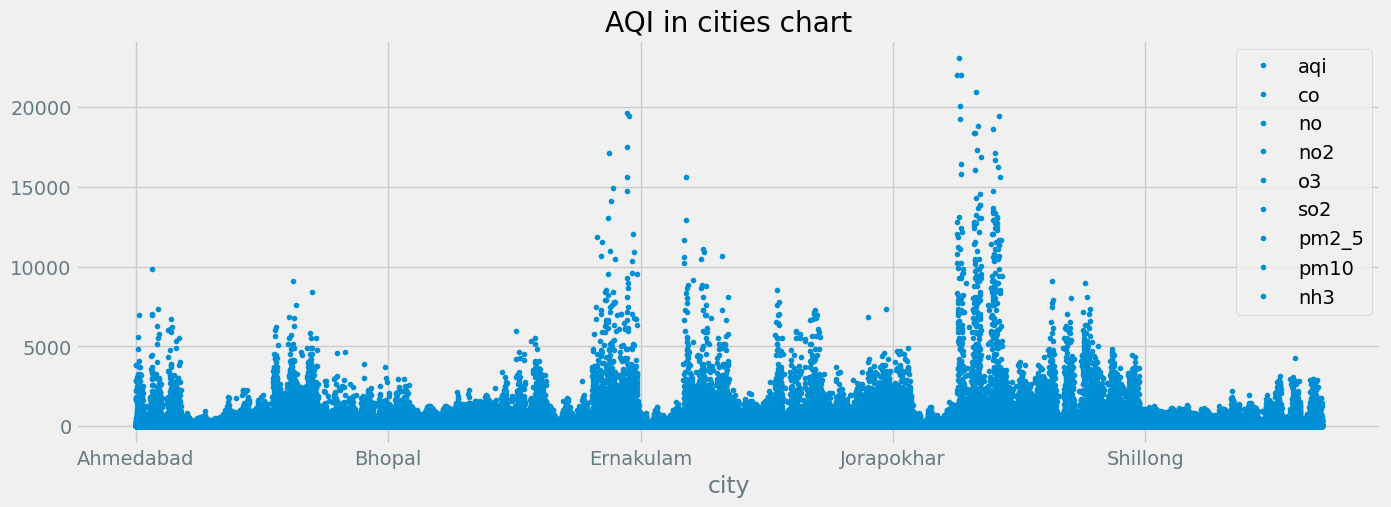

In [ ]:
df.plot(style='.',figsize=(15,5),color=color_pal[0],title='AQI in cities chart')

In [ ]:
train = df.loc[df.index ]